# Assignment 4

Welcome to assignment #4! In this assignment we'll continue with feature engineering.

You'll see that a lot of good feature engineering depends on understanding your data. The exploratory data analysis skills we've been developing will come in handy!

Note: You need to answer all questions in complete sentences. Failure to do so will result in part or zero marks. 


In [199]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme(style='darkgrid', font_scale = 1.5,
              rc={'figure.figsize':(7,5)})

# plt.rc('figure', dpi=100, figsize=(7, 5))
# plt.rc('font', size=12)
rng = np.random.default_rng()

In [200]:
# The following function randomly generates x and y values. DO NOT CHANGE IT!
import random
import numpy as np
random.seed(1234)
np.random.seed(1234)
# Function to randomly generate related x and y values. DO NOT EDIT!
def random_data(p=1, size=200, noise_sd = .1, q=1):
    x = list(np.linspace(0.01, 1, size))
    y = [(3 + 5 * x_val ** p + (random.normalvariate(0,noise_sd))) ** (1/q) for x_val in x]
    return x, y

In [201]:
# load the data
import pandas as pd
df = pd.read_csv("https://busan302.mycourses.work/data/house_price_train.csv")

<div class="alert alert-block alert-success">

> Indented block


    
### Q1. Plot SalePrice and the **3** explanatory variables in a scatter matrix. (1 mark) You can see more of this [here](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html).

</div>

              SalePrice  YearBuilt  LotFrontage  TotRmsAbvGrd
SalePrice      1.000000   0.522897     0.351799      0.533723
YearBuilt      0.522897   1.000000     0.123349      0.095589
LotFrontage    0.351799   0.123349     1.000000      0.352096
TotRmsAbvGrd   0.533723   0.095589     0.352096      1.000000



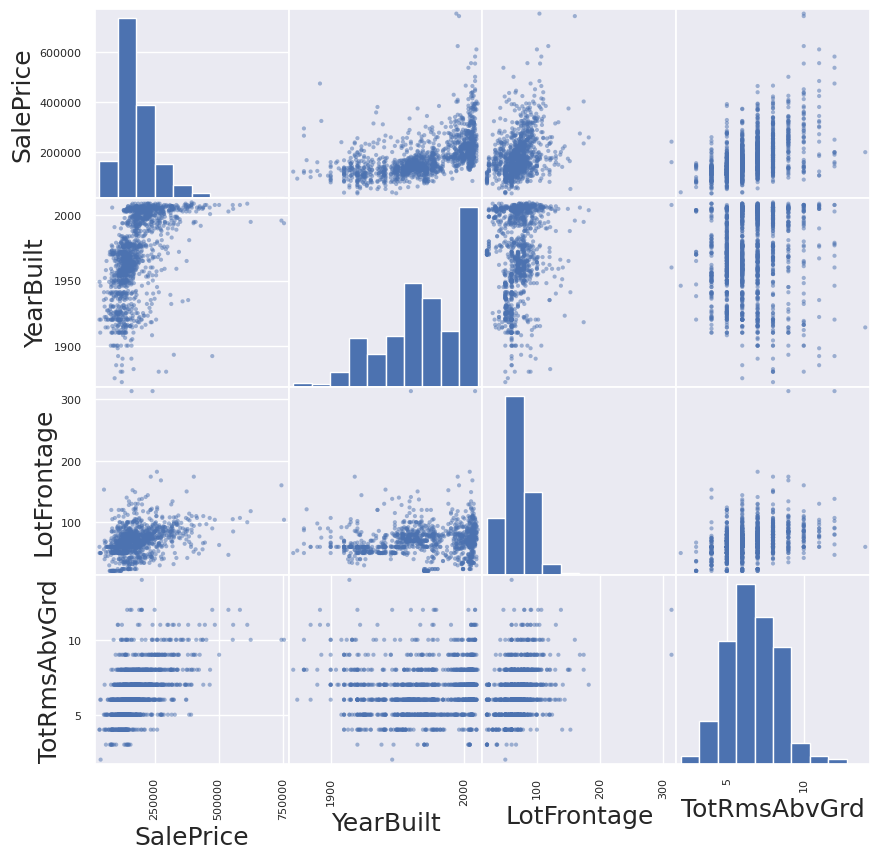

In [202]:
# SalePrice and the 3 explanatory variables for a scatter matrix
data = df[["SalePrice", "YearBuilt", "LotFrontage", "TotRmsAbvGrd"]]
print(data.corr())
print()

# A scatter matrix
pd.plotting.scatter_matrix(data, alpha=0.5, figsize=(10, 10));

<div class="alert alert-block alert-success">
    
### Q2. Examine the histogram of SalePrice. Describe the distribution. Show how you would transform this to a normal distribution. (2 marks)

</div>

- The distribution of SalePrice shows right skewed and the standardized normal distribution seems great. The SalePrice is measured in what are called standard deviations. The observations are within two standard deviations that is known as the Empirical Rule.


- SalePrice went up to about $500,000
- Log transformed SalePrice (ln_SalePrice) went approximately 4 to just over 13.5
- The standardized SalePrice (std_SalePrice) goes from around -2.5 to 2.5 standard deviations.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a041c9e10>,
      dtype=object)

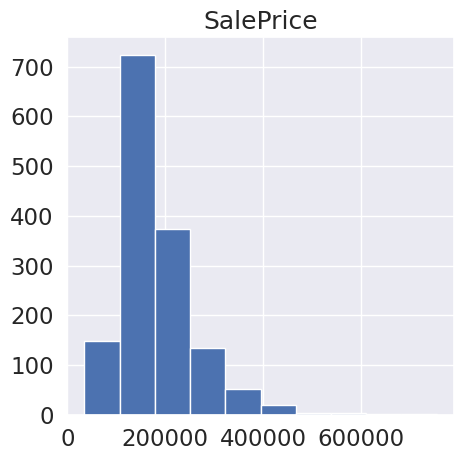

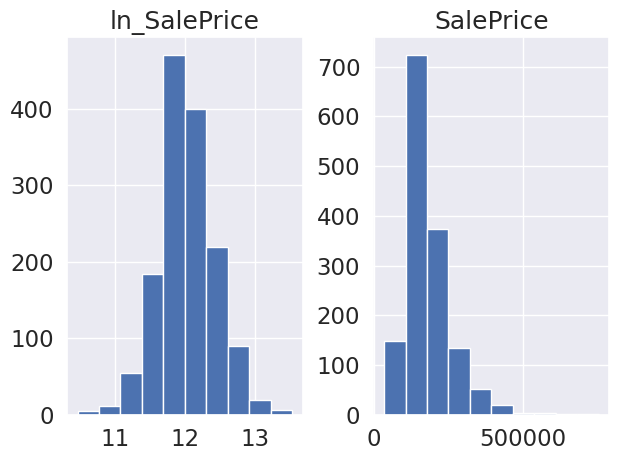

In [203]:
# Histogram of SalePrice
salePrice_hist = df.hist(column="SalePrice", figsize=(5, 5))

# Transform it to a Normal distribution
# Log transformation of SalePrice
df["ln_SalePrice"] = np.log(df["SalePrice"])
df.hist(["ln_SalePrice", "SalePrice"])



<div class="alert alert-block alert-success">
    
### Q3. Make a separate scatterplot showing SalePrice and LotArea how would you describe the relationship? (1 mark)
    
You can read more about [scatterplots in pandas here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html).
    
    
</div>

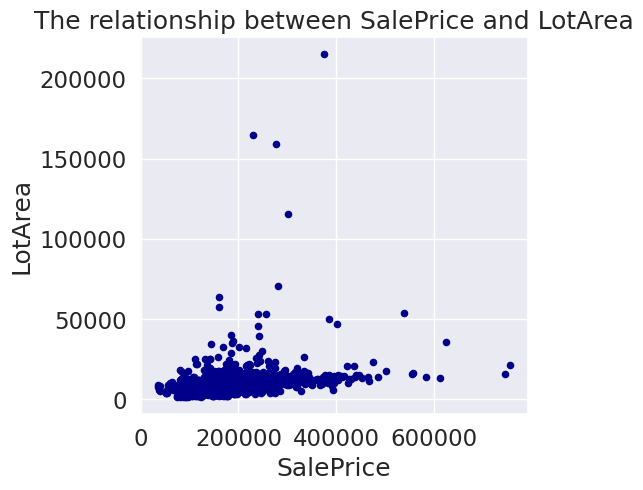

In [204]:
# ANSWER

# Scatter plot showing SalePrice and LotArea
df.plot.scatter(x="SalePrice", y="LotArea", color="DarkBlue", figsize=(5, 5), title = "The relationship between SalePrice and LotArea")


- The relationship between SalePrice and LotArea has a weak linear relationship (uncorrelated), and the relationship has been clustered in SalePrice between approximately 150,000 and 280,000.


### Q4. Is it possible to quantify the **relationship** between these two variables? If so, explain what value you found and the meaning of the measurement. (1 mark)


In [205]:
#Quantify relationship
quantify_relationship = df[["SalePrice","LotArea"]]
print(quantify_relationship.corr())

           SalePrice   LotArea
SalePrice   1.000000  0.263843
LotArea     0.263843  1.000000


- Yes, the LotArea and SalePrice variables can quantify the relationship because the scatter plot shows a weak positive linear relationship and indicates a correlation value of about 0.26.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a042d5950>,
      dtype=object)

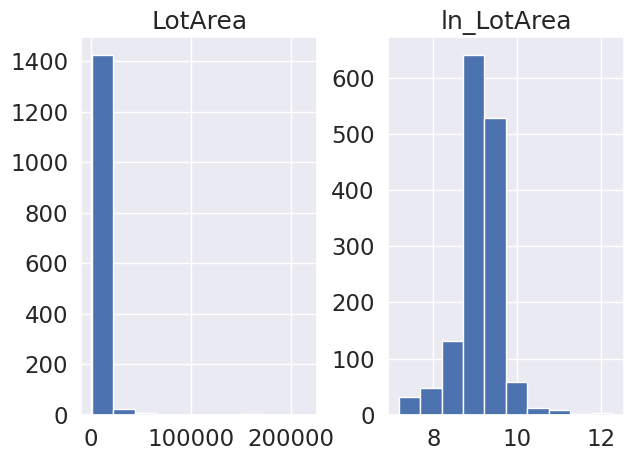

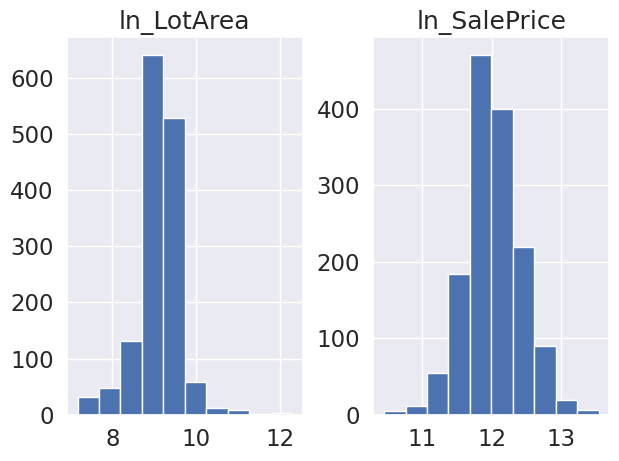

In [206]:
# ANSWER

df["ln_LotArea"] = np.log(df["LotArea"])
df.hist(["LotArea", "ln_LotArea"])

#Recall SalePrice from Q2
df["ln_SalePrice"] = np.log(df["SalePrice"])

# Log transformation of SalePrice and LotArea
df.hist(["ln_LotArea", "ln_SalePrice"])

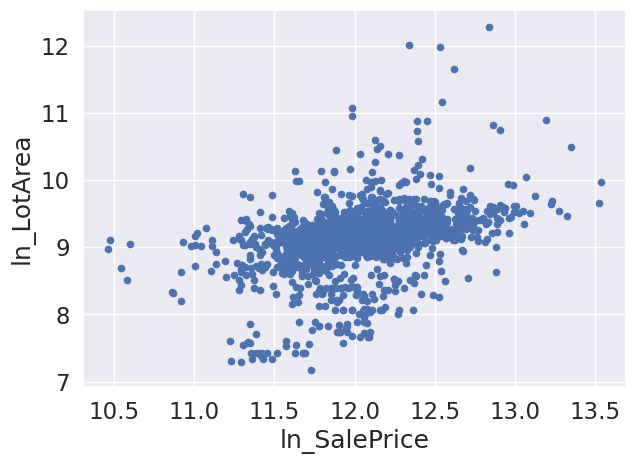

In [207]:
df.plot.scatter(x='ln_SalePrice', y='ln_LotArea');

<div class="alert alert-block alert-success">

### Q5. Look at the generated scatter plots, in <font color='red'>red</font>, showing the relationships between x and y variables. Use Tukey's ladder of powers to transform x and/or y into having a linear relationship in the <font color='blue'>blue</font> scatter plot that follows. (1 mark each)


<img src='https://busan302.mycourses.work/images/bulge.png' width=350>

<img src='https://busan302.mycourses.work/images/tukey-ladder-of-powers.png'>

</div>

### Example code:
To create a new column, xpow, in the dataframe. This takes the x to the power of 1.
<pre>
mdf['xpow'] = mdf['x']**1
</pre>

To create a new column, ypow, in the dataframe. This takes the logarithm of y.
Note that **np** is from the numpy library of mathematical functions. We imported that library above.
<pre>
mdf['ypow'] = np.log( mdf['y'] )
</pre>

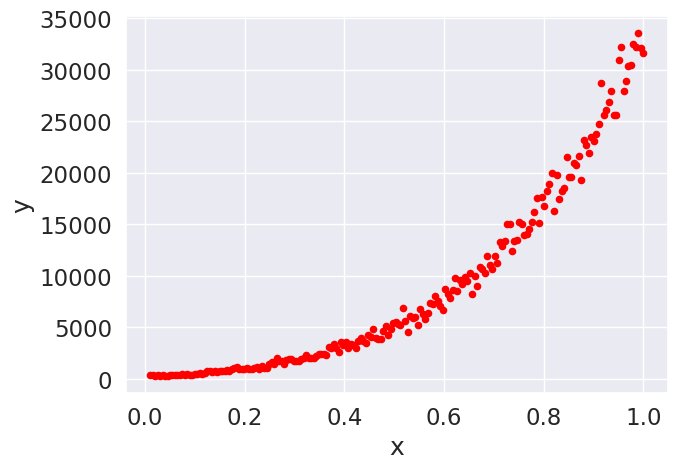

In [208]:
# Generating scatterplot -- Don't edit this cell.
x, y = random_data(p=1,q=.2)
mdf = pd.DataFrame()
mdf['y'] = y
mdf['x'] = x
mdf.plot.scatter(x='x',y='y',c='red');

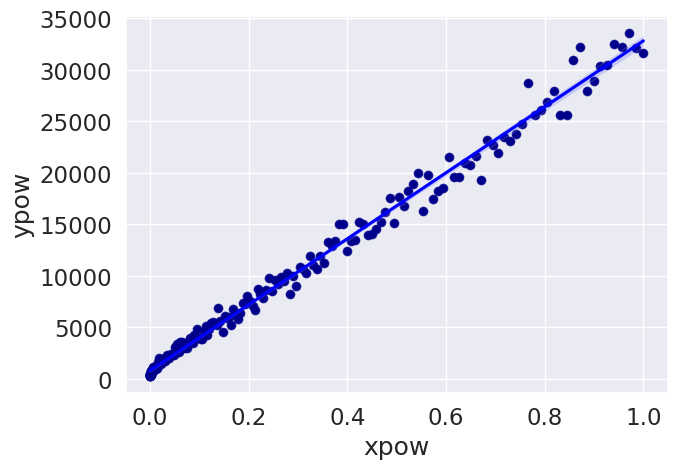

In [209]:
# Q5A - Your answer goes here

# Use Tukey's ladder of powers to transform x into having a linear relationship.
mdf['xpow'] = mdf['x']**3  ## transform x values (The original data was cubic in x)
mdf['ypow'] = mdf['y']  ## transform y values 
mdf.plot.scatter(x='xpow',y='ypow',c='DarkBlue');
sns.regplot(x='xpow',y='ypow',data=mdf, scatter_kws={"color": "DarkBlue"}, line_kws={"color": "blue"});

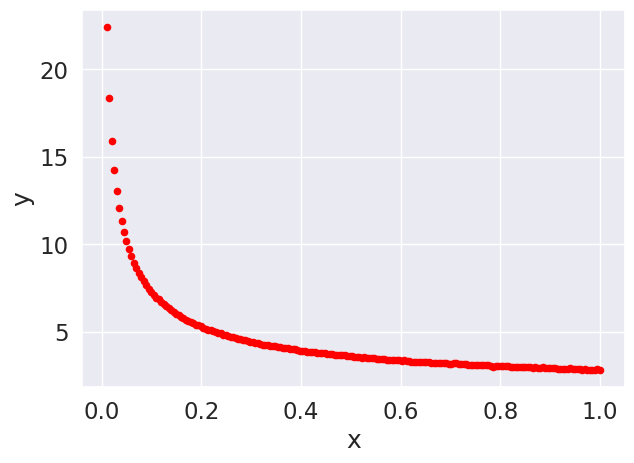

In [210]:
# Generating scatterplot -- Don't edit this cell.
x, y = random_data(p=-1,q=2)
mdf = pd.DataFrame()
mdf['y'] = y
mdf['x'] = x
mdf.plot.scatter(x='x',y='y',c='red');

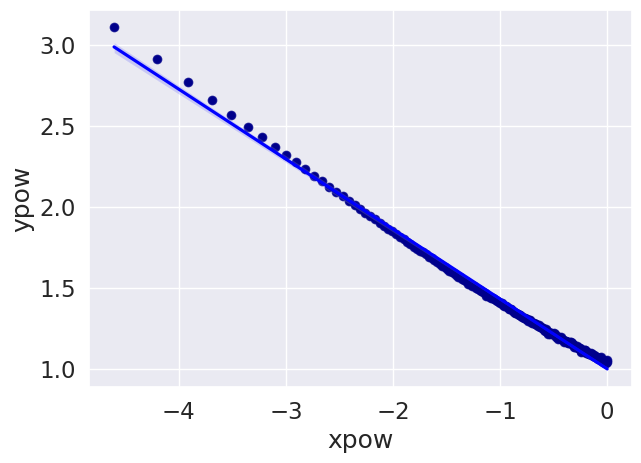

In [211]:
# Q5B - Your answer goes here

# Use Tukey's ladder of powers to transform x and y into having a linear relationship.
mdf['xpow'] = np.log(mdf['x']) ## transform x values (The log of x from the original data)
mdf['ypow'] = np.log(mdf['y']) ## transform y values (The log of y from the original data)
mdf.plot.scatter(x='xpow',y='ypow',c='DarkBlue');
sns.regplot(x='xpow',y='ypow',data=mdf, scatter_kws={"color": "DarkBlue"}, line_kws={"color": "blue"});

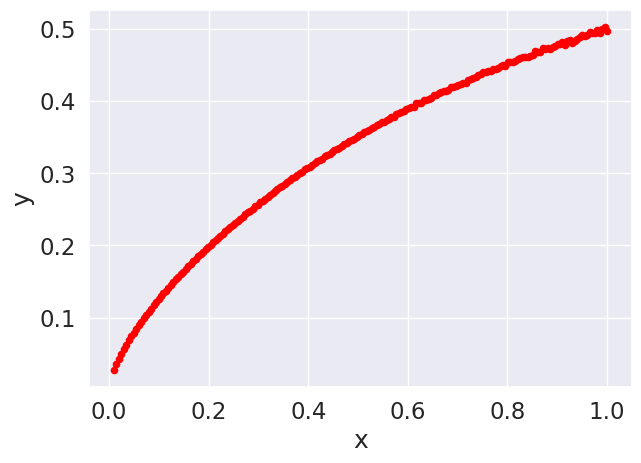

In [212]:
# Generating scatterplot -- Don't edit this cell.
x, y = random_data(p=-2,q=-3)
mdf = pd.DataFrame()
mdf['y'] = y
mdf['x'] = x
mdf.plot.scatter(x='x',y='y',c='red');

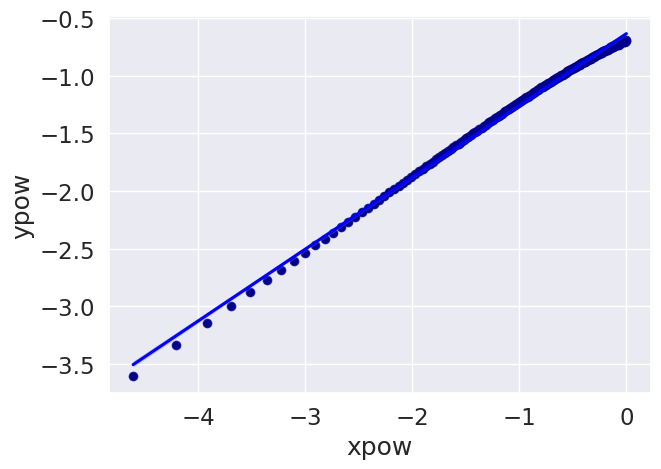

In [213]:
# Q5C - Your answer goes here

# Use Tukey's ladder of powers to transform x and y into having a linear relationship.
mdf['xpow'] = np.log(mdf['x']) ## transform x values (The log of x from the original data)
mdf['ypow'] = np.log(mdf['y']) ## transform y values (The log of y from the original data)
mdf.plot.scatter(x='xpow',y='ypow',c='DarkBlue');
sns.regplot(x='xpow',y='ypow',data=mdf, scatter_kws={"color": "DarkBlue"}, line_kws={"color": "blue"});

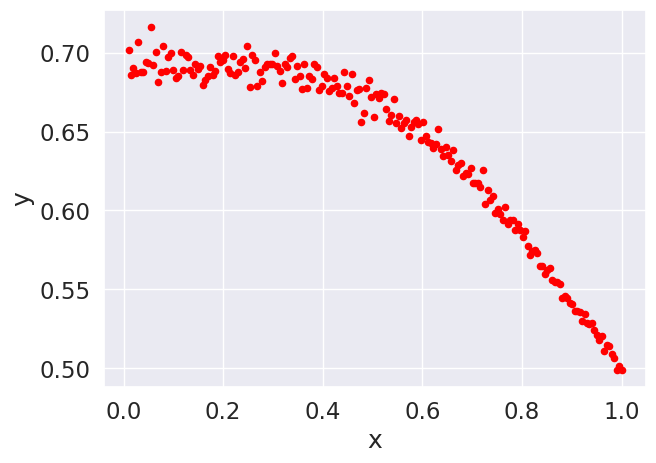

In [214]:
# Generating scatterplot -- Don't edit this cell.
x, y = random_data(p=4,q=-3)
mdf = pd.DataFrame()
mdf['y'] = y
mdf['x'] = x
mdf.plot.scatter(x='x',y='y',c='red');

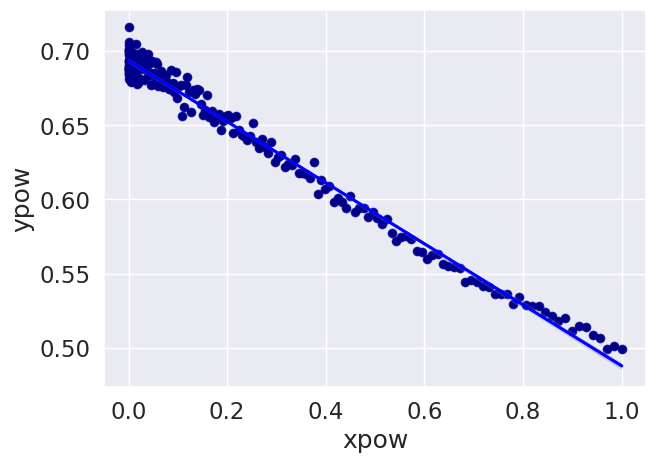

In [215]:
# Q5D - Your answer goes here

# Use Tukey's ladder of powers to transform x into having a linear relationship.
mdf['xpow'] = mdf['x']**3 ## transform x values (The original data was cubic in x)
mdf['ypow'] = mdf['y'] ## transform y values 
mdf.plot.scatter(x='xpow',y='ypow',c='DarkBlue');
sns.regplot(x='xpow',y='ypow',data=mdf, scatter_kws={"color": "DarkBlue"}, line_kws={"color": "blue"});

    
### Q6 (a). Some machine learning methods require that all of the variables be standardized or normalized. Describe one transformation you could apply to the SalePrice column and justify your decision. (1 mark)


- Machine learning methods require that all variables be standardized because performing standardization is to bring down all information to a standard scale without collapsing the differences in the range of the values. Also, the SalePrice standardization is about ensuring that data is internally consistent and standardized values are helpful for tracking. Standardization is proper when the feature distribution is Normal or Gaussian and is much less affected by outliers.


    
### Q6 (b). Visualize the transformation you chose for SalePrice in part (a). Show the histogram of SalePrice before and after the transformation. (1 mark)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79feb83350>,
      dtype=object)

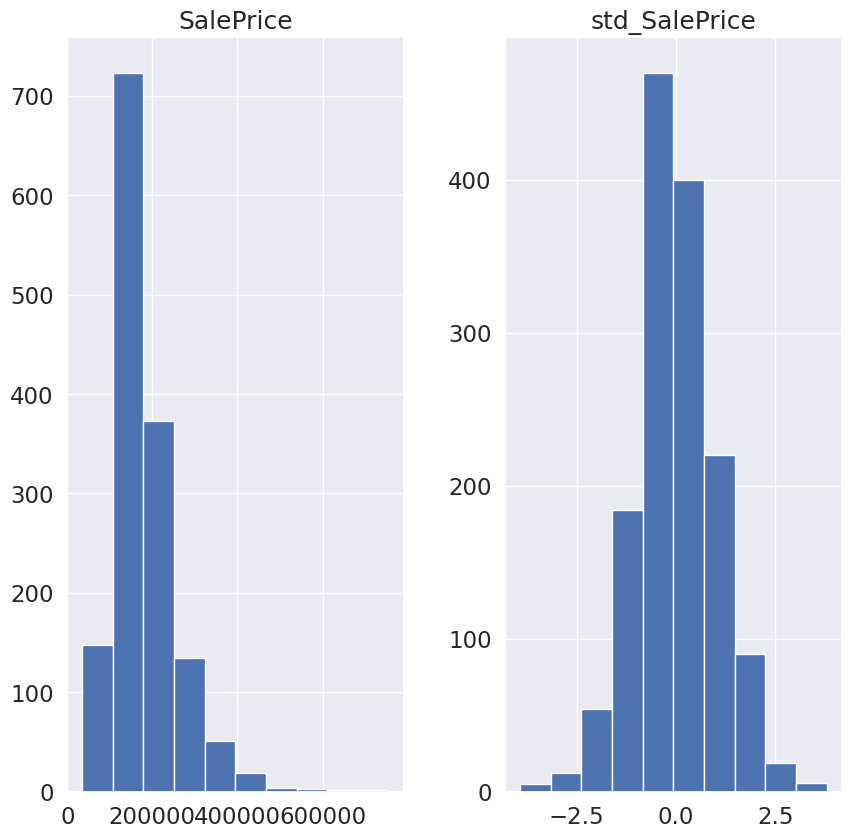

In [216]:
# ANSWER

# Standardizing of SalePrice
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

df["std_SalePrice"] = ss.fit_transform(df[["ln_SalePrice"]]) 

#  Visualize the transformation SalePrice before and after the transformation.
df.hist(["SalePrice", "std_SalePrice"], figsize=(10, 10))

    
### Q7(a)  Make a new regression model using the log transformed value of SalePrice as your dependent variable. Include two categorical variables and one continuous explanatory variable in your model. Show the model output and interpret the meanings of all variables you use. (3 marks)
    
Be sure to:
    
- Show all of your work transforming the variables. Comment your work if it is not obvious.
- Explain the interpretation of each of the coefficients in the model.
- Remember to use complete sentences!


In [218]:
# Put your code here

# transformed value of SalePrice: ln_SalePrice
# two categorical variables : OverallQual, BldgType
# one continuous explanatory variable : YearBuilt

              ln_SalePrice  YearBuilt
ln_SalePrice       1.00000    0.58657
YearBuilt          0.58657    1.00000


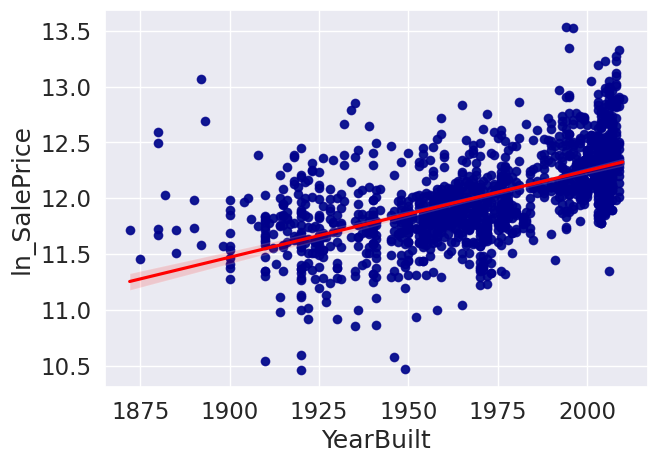

In [220]:
regression_data = df[["ln_SalePrice", "YearBuilt", "OverallQual", "BldgType"]]

coefficients1 = regression_data[["ln_SalePrice","YearBuilt"]]
print(coefficients1.corr())

regression_data.plot.scatter(x='YearBuilt', y='ln_SalePrice');
sns.regplot(x='YearBuilt',y='ln_SalePrice',data=regression_data, scatter_kws={"color": "DarkBlue"}, line_kws={"color": "red"});

- The log-transformed value of SalePrice and YearBuilt shows a positive linear relationship in which the correlation coefficient r is about 0.587.

              ln_SalePrice  OverallQual
ln_SalePrice      1.000000     0.817184
OverallQual       0.817184     1.000000


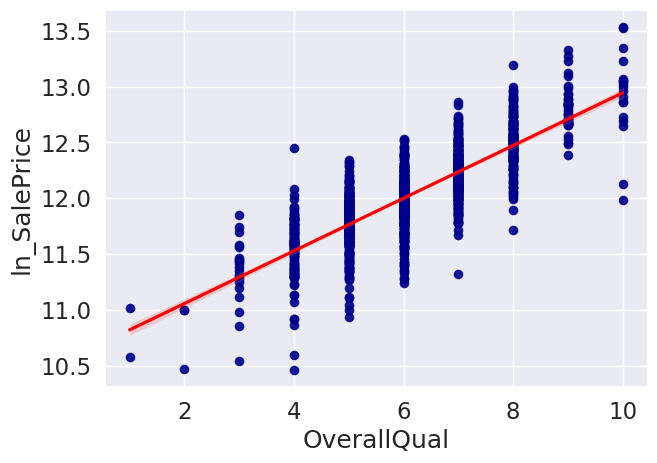

In [221]:
coefficients2 = regression_data[["ln_SalePrice","OverallQual"]]
print(coefficients2.corr())

regression_data.plot.scatter(x='OverallQual', y='ln_SalePrice');
sns.regplot(x='OverallQual',y='ln_SalePrice',data=regression_data, scatter_kws={"color": "DarkBlue"}, line_kws={"color": "red"});

- The log-transformed value of SalePrice and OverallQual shows a strong linear relationship in which the correlation coefficient r is about 0.812.

### Q7(b) Create a regression model using untransformed (i.e, not log transformed) SalePrice as the dependent variable and the same explanatory variables from part (a). Compare the $R^2$ value from the model you created with transformed SalePrice and this model with an untransformed SalePrice. 

### What does the comparison suggest to you? (1 mark) 

Note: There is no need to explain the output from this model. 


           SalePrice  YearBuilt
SalePrice   1.000000   0.522897
YearBuilt   0.522897   1.000000


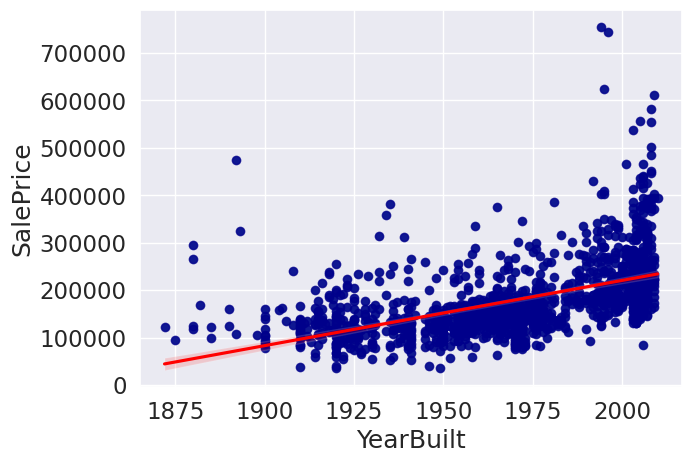

In [222]:
#Create a regression model using untransformed (i.e, not log transformed) SalePrice 

regression_data2 = df[["SalePrice", "YearBuilt", "OverallQual", "BldgType"]]

coefficients3 = regression_data2[["SalePrice","YearBuilt"]]
print(coefficients3.corr())

regression_data2.plot.scatter(x='YearBuilt', y='SalePrice');
sns.regplot(x='YearBuilt',y='SalePrice',data=regression_data2, scatter_kws={"color": "DarkBlue"}, line_kws={"color": "red"});


             SalePrice  OverallQual
SalePrice     1.000000     0.790982
OverallQual   0.790982     1.000000


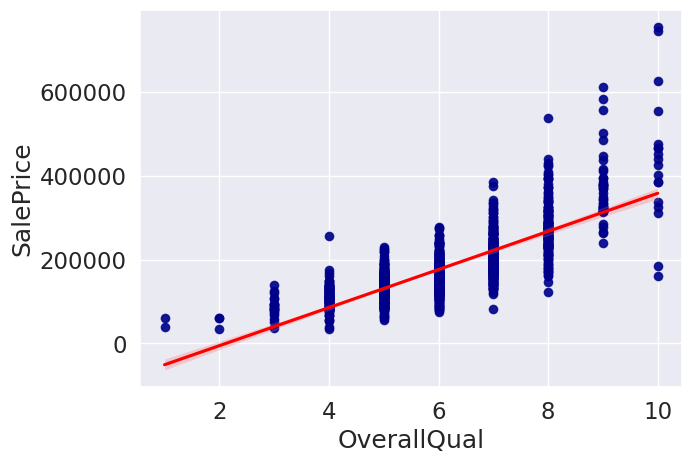

In [223]:
coefficients4 = regression_data2[["SalePrice","OverallQual"]]
print(coefficients4.corr())

regression_data2.plot.scatter(x='OverallQual', y='SalePrice');
sns.regplot(x='OverallQual',y='SalePrice',data=regression_data2, scatter_kws={"color": "DarkBlue"}, line_kws={"color": "red"});

- Compare the $R^2$ value from the model that created with transformed SalePrice and this model with an untransformed SalePrice, it shows that the low strength and direction of the linear association between two variables also indicates a low correlation coefficient r than the $R^2$ value from the model that created with transformed SalePrice.

